# Justification du choix des secteurs
## Intro
on a étudié les données "historiques" mise en lligne concernant le CIR de la part du Ministère de l'enseignement supérieur et de la recherche (https://www.enseignementsup-recherche.gouv.fr/fr/credit-d-impot-recherche-etudes-et-resultats-statistiques-46391) on a réuni les statistiques intéressantes dans le dossier CIR.csv 

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams

# Définir Times New Roman comme police par défaut pour tout le graphique
rcParams['font.family'] = 'Times New Roman'


In [ ]:
# Charger le fichier CSV
df= pd.read_csv("CIR_datagov.csv", sep=';')

df.columns = df.columns.str.strip()
df = df.apply(pd.to_numeric, errors='coerce')

## Différence entre ETI et GE
Dans les rapports statistiques du gouvernement, à partir de 2015, les données (du nombre de bénéficiaires, de dépenses en R&D déclarés et de montant de CIR reçu) sont précisées en fonction de la catégorie d'entreprises. On s'est alors intéressés à la différence entre GE et ETI. 

In [ ]:
# Calculer les moyennes
df_2015 = df[df['annee'] >= 2015]

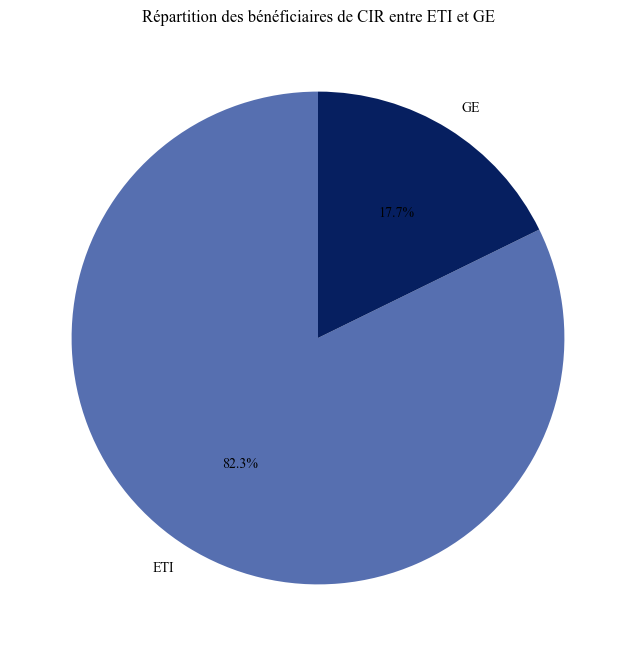

In [ ]:
# Calculer la somme des bénéficiaires pour chaque catégorie
somme_beneficiaires = {
    'ETI': df_2015['ETI_beneficiaire_nbr'].sum(),
    'GE': df_2015['GE_beneficaire_nbr'].sum()
}

# Tracer le diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(somme_beneficiaires.values(), labels=somme_beneficiaires.keys(), autopct='%1.1f%%', startangle=90, colors=[(86/255,111/255,176/255), (6/255,31/255,96/255)])
plt.title("Répartition des bénéficiaires de CIR entre ETI et GE")
plt.show()

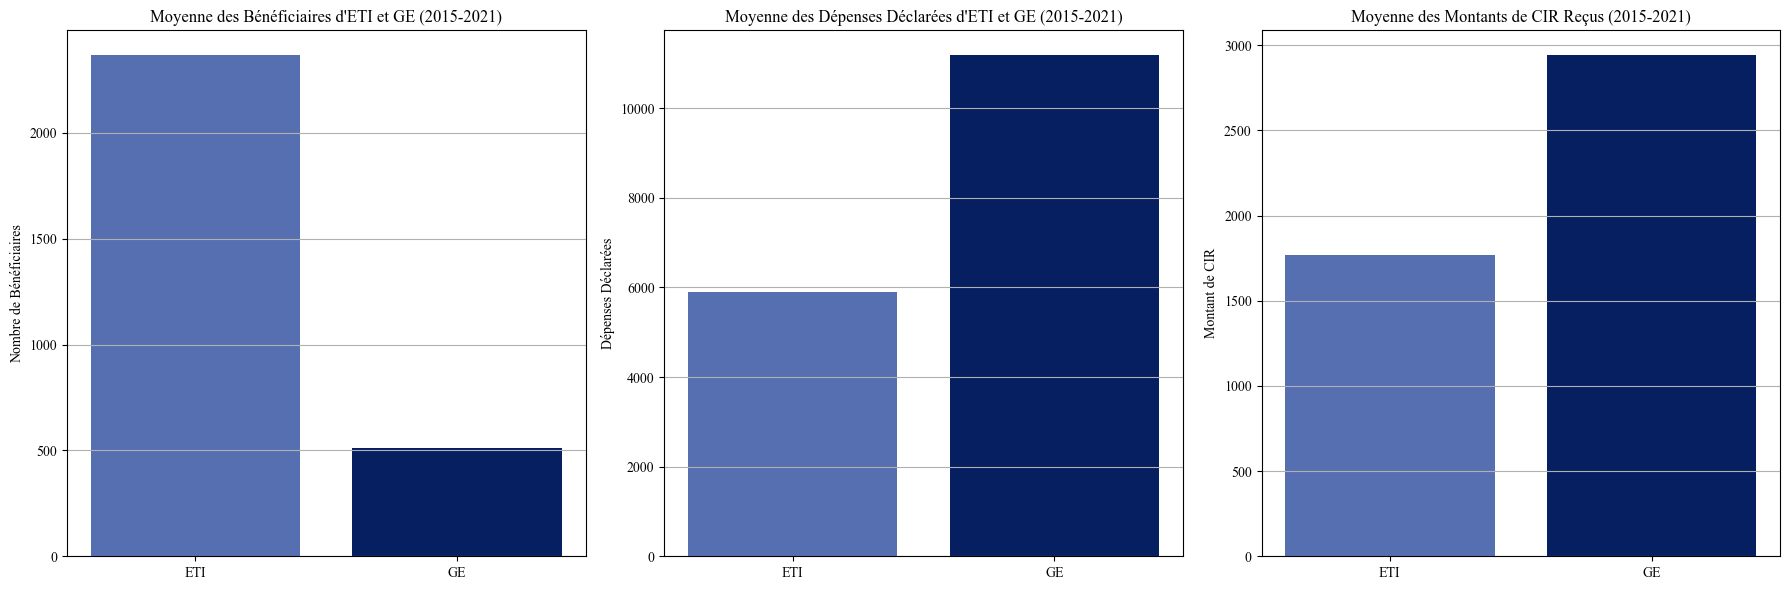

In [ ]:
avg_ETI_beneficiaire = df_2015['ETI_beneficiaire_nbr'].mean()
avg_GE_beneficiaire = df_2015['GE_beneficaire_nbr'].mean()
avg_ETI_dps = df_2015['ETI_dps_declare'].mean()

avg_GE_dps = df_2015['GE_dps_declare'].mean()
avg_ETI_CIR = df_2015['ETI_CIR'].mean()
avg_GE_CIR = df_2015['GE_CIR'].mean()

# Tracer les graphiques
plt.figure(figsize=(18, 6))

# Graphique 1 : Moyenne des bénéficiaires d'ETI et GE
plt.subplot(1, 3, 1)
plt.bar(['ETI', 'GE'], [avg_ETI_beneficiaire, avg_GE_beneficiaire], color=[(86/255,111/255,176/255), (6/255,31/255,96/255)])
plt.title("Moyenne des Bénéficiaires d'ETI et GE (2015-2021)")
plt.ylabel("Nombre de Bénéficiaires")
plt.grid(axis='y')

# Graphique 2 : Moyenne des dépenses déclarées d'ETI et GE
plt.subplot(1, 3, 2)
plt.bar(['ETI', 'GE'], [avg_ETI_dps, avg_GE_dps], color=[(86/255,111/255,176/255), (6/255,31/255,96/255)])
plt.title("Moyenne des Dépenses Déclarées d'ETI et GE (2015-2021)")
plt.ylabel("Dépenses Déclarées")
plt.grid(axis='y')

# Graphique 3 : Moyenne des montants de CIR reçus
plt.subplot(1, 3, 3)
plt.bar(['ETI', 'GE'], [avg_ETI_CIR, avg_GE_CIR], color=[(86/255,111/255,176/255), (6/255,31/255,96/255)])
plt.title("Moyenne des Montants de CIR Reçus (2015-2021)")
plt.ylabel("Montant de CIR")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

On peut reagrde l'évolution séparé de chacune des 3 variables selon la catégories d'entreprise.

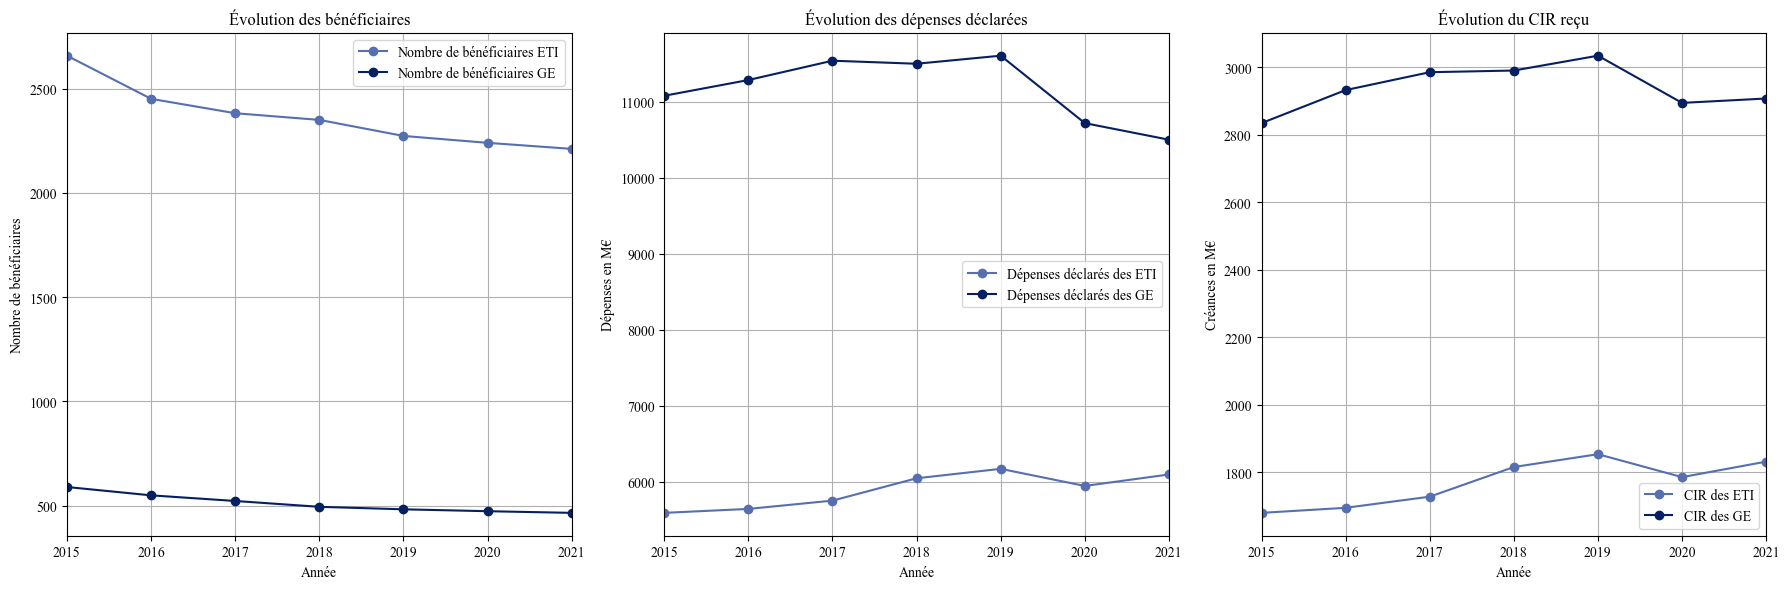

In [ ]:

# Tracer les graphiques
plt.figure(figsize=(18, 6))

# Graphique 1 : Moyenne des bénéficiaires d'ETI et GE
plt.subplot(1, 3, 1)
plt.plot(df_2015['annee'], df_2015['ETI_beneficiaire_nbr'], marker='o', label='Nombre de bénéficiaires ETI', color=(86/255,111/255,176/255))
plt.plot(df_2015['annee'], df_2015['GE_beneficaire_nbr'], marker='o', label='Nombre de bénéficiaires GE', color=(6/255,31/255,96/255))
plt.xlim(2015, 2021)
plt.title("Évolution des bénéficiaires")
plt.xlabel("Année")
plt.ylabel("Nombre de bénéficiaires")
plt.xticks(df_2015['annee'])
plt.grid()
plt.legend()
plt.tight_layout()

# Graphique 2 : Moyenne des dépenses déclarées d'ETI et GE
plt.subplot(1, 3, 2)
plt.plot(df_2015['annee'], df_2015['ETI_dps_declare'], marker='o', label='Dépenses déclarés des ETI', color=(86/255,111/255,176/255))
plt.plot(df_2015['annee'], df_2015['GE_dps_declare'], marker='o', label='Dépenses déclarés des GE', color=(6/255,31/255,96/255))
plt.xlim(2015, 2021)
plt.title("Évolution des dépenses déclarées")
plt.xlabel("Année")
plt.ylabel("Dépenses en M€")
plt.xticks(df_2015['annee'])
plt.grid()
plt.legend()
plt.tight_layout()

# Graphique 3 : Moyenne des montants de CIR reçus
plt.subplot(1, 3, 3)
plt.plot(df_2015['annee'], df_2015['ETI_CIR'], marker='o', label='CIR des ETI', color=(86/255,111/255,176/255))
plt.plot(df_2015['annee'], df_2015['GE_CIR'], marker='o', label='CIR des GE', color=(6/255,31/255,96/255))
plt.xlim(2015, 2021)
plt.title("Évolution du CIR reçu")
plt.xlabel("Année")
plt.ylabel("Créances en M€")
plt.xticks(df_2015['annee'])
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

Il est possible de faire d'autres études sur ces données comme les dynamiques d'évolutions des nombre de béficiaires, de dépenses ou de montant en fonction du type d'entreprises.

C:\Users\lucie\AppData\Local\Temp\ipykernel_8796\4185744990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['ETI_b_growth'] = df['ETI_beneficiaire_nbr'].pct_change() * 100
C:\Users\lucie\AppData\Local\Temp\ipykernel_8796\4185744990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['GE_b_growth'] = df['GE_beneficaire_nbr'].pct_change() * 100
C:\Users\lucie\AppData\Local\Temp\ipykernel_8796\4185744990.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

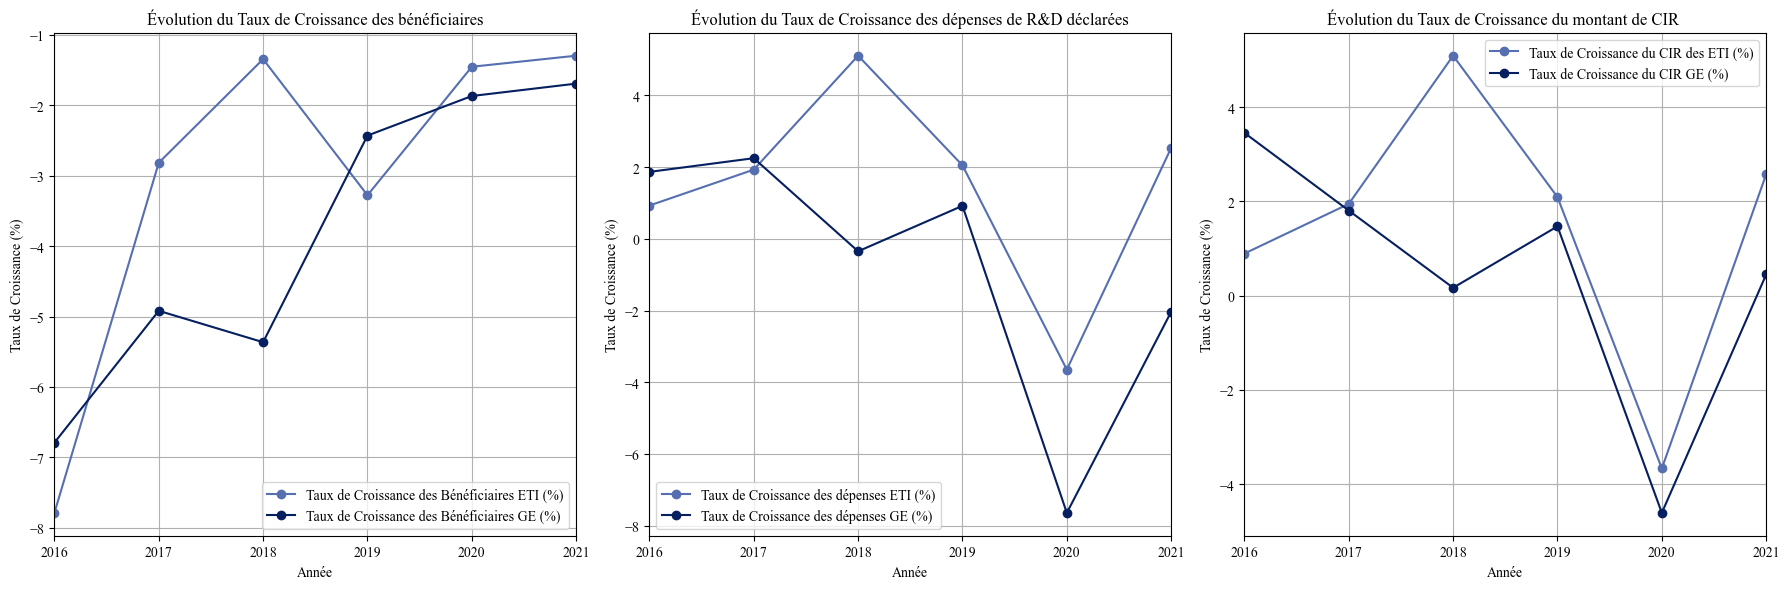

In [ ]:
# Calculer le taux de croissance de bénéficiaires
df_2015['ETI_b_growth'] = df['ETI_beneficiaire_nbr'].pct_change() * 100
df_2015['GE_b_growth'] = df['GE_beneficaire_nbr'].pct_change() * 100

#Calculer le taux de croissance des dps déclaré
df_2015['ETI_d_growth'] = df['ETI_dps_declare'].pct_change() * 100
df_2015['GE_d_growth'] = df['GE_dps_declare'].pct_change() * 100

# Calculer le taux de croissance de la créance recherche
df_2015['ETI_CIR_growth'] = df['ETI_CIR'].pct_change() * 100
df_2015['GE_CIR_growth'] = df['GE_CIR'].pct_change() * 100

# Tracer les graphiques
plt.figure(figsize=(18, 6))

# Graphique 1 : Moyenne des bénéficiaires d'ETI et GE
plt.subplot(1, 3, 1)
plt.plot(df_2015['annee'][1:], df_2015['ETI_b_growth'][1:], marker='o', label='Taux de Croissance des Bénéficiaires ETI (%)', color=(86/255,111/255,176/255))
plt.plot(df_2015['annee'][1:], df_2015['GE_b_growth'][1:], marker='o', label='Taux de Croissance des Bénéficiaires GE (%)', color=(6/255,31/255,96/255))

# Ajuster l'échelle de l'axe X pour commencer à partir de 2015
plt.xlim(2016, 2021)
# Ajouter des détails au graphique
plt.title("Évolution du Taux de Croissance des bénéficiaires")
plt.xlabel("Année")
plt.ylabel("Taux de Croissance (%)")
plt.xticks(df_2015['annee'][1:])  # Afficher les années à partir de 2015
plt.grid()
plt.legend()
plt.tight_layout()

# Graphique 2 : Moyenne des dépenses déclarées d'ETI et GE
plt.subplot(1, 3, 2)
plt.plot(df_2015['annee'][1:], df_2015['ETI_d_growth'][1:], marker='o', label='Taux de Croissance des dépenses ETI (%)', color=(86/255,111/255,176/255))
plt.plot(df_2015['annee'][1:], df_2015['GE_d_growth'][1:], marker='o', label='Taux de Croissance des dépenses GE (%)', color=(6/255,31/255,96/255))

# Ajuster l'échelle de l'axe X pour commencer à partir de 2015
plt.xlim(2016, 2021)
# Ajouter des détails au graphique
plt.title("Évolution du Taux de Croissance des dépenses de R&D déclarées")
plt.xlabel("Année")
plt.ylabel("Taux de Croissance (%)")
plt.xticks(df_2015['annee'][1:])  # Afficher les années à partir de 2015
plt.grid()
plt.legend()
plt.tight_layout()

# Graphique 3 : Moyenne des montants de CIR reçus
plt.subplot(1, 3, 3)
plt.plot(df_2015['annee'][1:], df_2015['ETI_CIR_growth'][1:], marker='o', label='Taux de Croissance du CIR des ETI (%)', color=(86/255,111/255,176/255))
plt.plot(df_2015['annee'][1:], df_2015['GE_CIR_growth'][1:], marker='o', label='Taux de Croissance du CIR GE (%)', color=(6/255,31/255,96/255))

# Ajuster l'échelle de l'axe X pour commencer à partir de 2015
plt.xlim(2016, 2021)
# Ajouter des détails au graphique
plt.title("Évolution du Taux de Croissance du montant de CIR ")
plt.xlabel("Année")
plt.ylabel("Taux de Croissance (%)")
plt.xticks(df_2015['annee'][1:])  # Afficher les années à partir de 2015
plt.grid()
plt.legend()
plt.tight_layout()


plt.show()


## Etude des secteurs recevant le CIR sur 12 ans
Dans ces données du ministère, on peut retrouver la répartition des montant de CIR dans les différents secteurs d'activités. Ces analyses vont de 2009 à 2021. 

In [ ]:
"""Création d'un dictionnaire de traduction entre NAF et secteurs"""


# Lire le fichier CSV pour créer le dictionnaire
naf_df = pd.read_csv('naf2008_liste_n2.csv', sep=';', skiprows=2)

# Afficher les colonnes du DataFrame pour vérifier les noms des colonnes
print("Colonnes du DataFrame :")
# Réindexer les lignes pour commencer à 0
naf_df.reset_index(drop=True, inplace=True)
print(naf_df.columns)

# Filtrer les valeurs manquantes dans la colonne 'Code'
naf_df = naf_df[naf_df['Code'].notna()]

# Créer un dictionnaire à partir du DataFrame avec formatage des clés
column_labels = {
    str(int(float(code))).zfill(2): description
    for code, description in zip(naf_df['Code'], naf_df['Libellé'])
}


# Fonction pour vérifier et convertir les colonnes en chaînes de caractères
def convert_to_str(value):
    if isinstance(value, (int, float)):
        return str(int(value))
    return str(value)

# Dictionnaire final pour les colonnes du DataFrame
final_column_labels = {}

# Vérifier les colonnes du DataFrame et créer le dictionnaire final
for col in df.columns[1:]:  # On commence à partir de la 3ème colonne
    if col == 'TOTAL':  # Arrêter le traitement si la colonne est 'TOTAL'
        break

    col_parts = col.split('_')
    descriptions = []
    for part in col_parts:
        try:
            part_str = str(int(part)).zfill(2)  # Formater la clé
            if part_str in column_labels:
                descriptions.append(column_labels[part_str])
            else:
                print(f"Attention : La partie {part_str} dans la colonne {col} n'a pas de correspondance.")
        except ValueError:
            print(f"Erreur de conversion pour la partie {part} dans la colonne {col}.")

    # Joindre les descriptions avec un espace
    final_column_labels[col] = "\n".join(descriptions)

print(final_column_labels)

Colonnes du DataFrame :
Index(['Code', 'Libellé'], dtype='object')
{'20_21': 'Industrie chimique\nIndustrie pharmaceutique', '26': 'Fabrication de produits informatiques\\nélectroniques et optiques', '29': 'Industrie automobile', '30': "Fabrication d'autres matériels de transport", '22': 'Fabrication de produits en caoutchouc et en plastique', '25': "Fabrication de produits métalliques\\nà l'exception des machines et des équipements", '24': 'Métallurgie', '19': 'Cokéfaction et raffinage', '13_14_15': "Fabrication de textiles\nIndustrie de l'habillement\nIndustrie du cuir et de la chaussure", '32': 'Autres industries manufacturières', '10': 'Industries alimentaires', '33': "Réparation et installation de machines et d'équipements", '62': 'Programmation, conseil et autres activités informatiques', '71': "Activités d'architecture et d'ingénierie\\nactivités de contrôle et analyses techniques", '45_46_47': "Commerce et réparation d'automobiles et de motocycles\nCommerce de gros, à l'excepti

## Etude des secteurs recevant le CIR à partir de 2016
Puisque nous regardons l'historique du CIR que à partir de 2016 on peut refaire les même graphique en se restreignant aux années qui nous intéresse. 

In [ ]:
df_2016 = df[df['annee'] >= 2016]
df_secteur_2016 = df_2016.iloc[:, :22]
df_secteur_2016 = df_secteur_2016.mul(df['TOTAL'], axis=0)  # Multiplier par la colonne Totale
# Suppression des lignes indexées de 0 à 6
df_secteur_2016 = df_secteur_2016.drop(index=range(0, 7))
df_secteur_2016 = df_secteur_2016.transpose()

Miantenant l'affichage des secteurs ayant reçu le plus de CIR au cours de nos années d'études

26                   591059.2
62                   552064.7
20_21                436045.3
71                   288640.3
29                   277907.9
30                   264020.4
22                   198449.8
72                   192121.5
25                   164920.5
32                   152715.2
94_95_96             119225.7
24                   115661.7
01_02_03_41_42_43    100401.5
19                    91921.6
10                    91880.5
45_46_47              86954.1
70                    79564.1
64_65_66              70938.3
61                    49435.4
13_14_15              18347.6
33                        0.0
Name: sums, dtype: float64


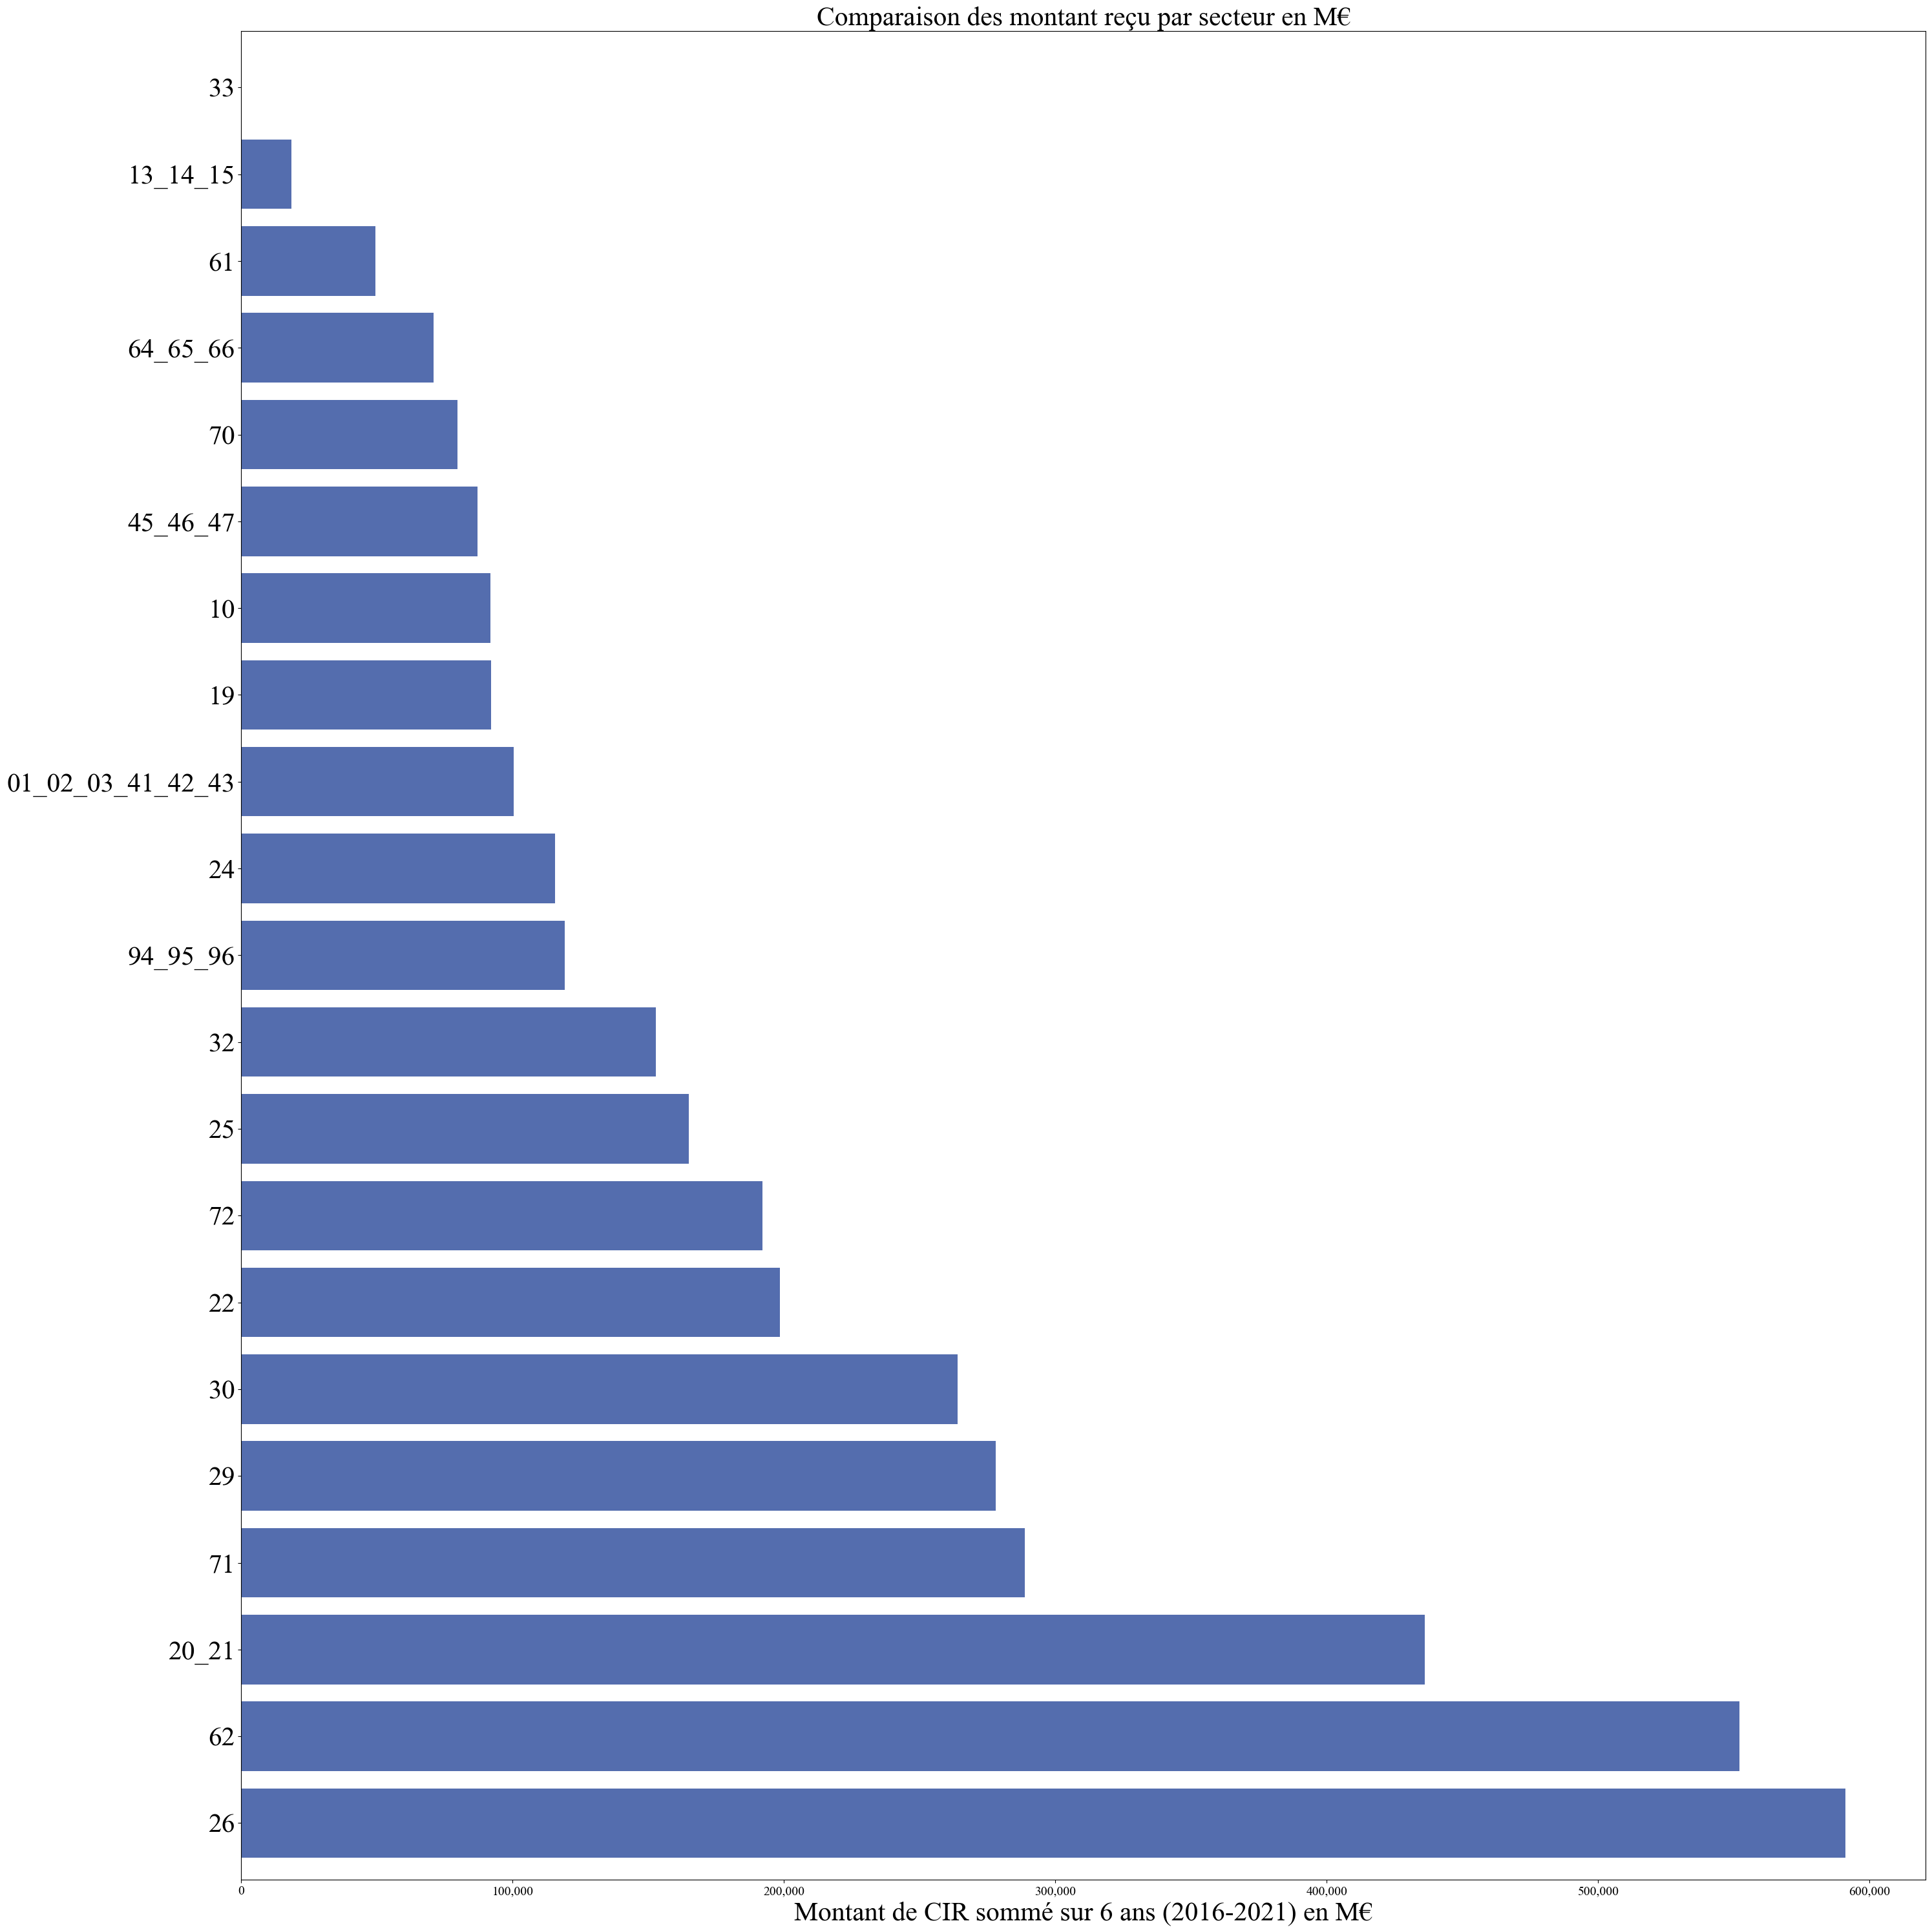

In [ ]:
# Calculer les sommes des colonnes (ignorer la ligne 'annee')
df_secteur_2016['sums'] = df_secteur_2016.iloc[1:].sum(axis=1)
# Remettre la valeur de 'means' à NaN pour la ligne 'annee'
df_secteur_2016.loc['annee', 'sums'] = np.nan

#ranger dans l'ordre croissant
df_sorted = df_secteur_2016['sums'].drop('annee').sort_values(ascending=False)
# Mapper les valeurs du dictionnaire pour renommer les indices
#df_sorted.rename(index=final_column_labels, inplace=True)  # Assurez-vous que final_column_labels est bien défin
print(df_sorted)
df_sorted_display = df_sorted.copy()
#df_sorted_display.index = df_sorted_display.index.str.slice(0, 60)  # Tronquer les index pour l'affichage

plt.figure(figsize=(30, 30))  
df_sorted_display.plot(kind='barh', width=0.8, color='#546DAE')

# Configuration des axes avec la taille de police
plt.xlabel('Montant de CIR sommé sur 6 ans (2016-2021) en M€', fontsize=30)
plt.title('Comparaison des montant reçu par secteur en M€', fontsize=30)
plt.yticks(rotation=0, fontsize=30 )
plt.xticks(fontsize=14)
# Ajouter des étiquettes formatées sur l'axe X
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Formatage des nombres

# Affichage du graphique avec la mise en page
plt.tight_layout()

plt.show()

In [ ]:
# Sélectionner les 11 plus gros secteurs
df_top_11 = df_sorted.head(11)

# Afficher uniquement les noms des secteurs
noms_secteurs2 = df_top_11.index
print(f"On a alors ces 11 premiers secteurs : {noms_secteurs2} (les mêmes que précédemmment)")

On a alors ces 11 premiers secteurs : Index(['26', '62', '20_21', '71', '29', '30', '22', '72', '25', '32',
       '94_95_96'],
      dtype='object') (les mêmes que précédemmment)


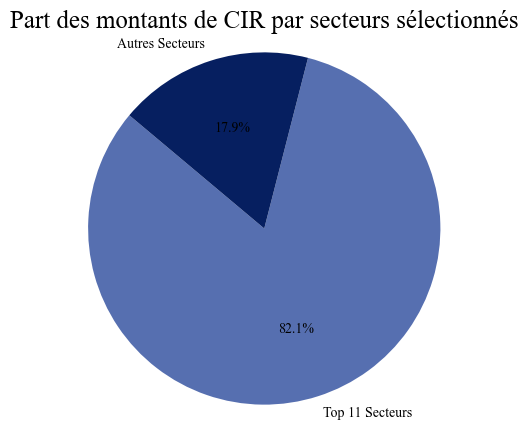

In [ ]:
# Calculer le montant total des autres secteurs
montant_autres = df_sorted.sum() - df_top_11.sum()

# Créer un DataFrame pour le diagramme circulaire
data_pie = pd.Series({
    'Top 11 Secteurs': df_top_11.sum(),
    'Autres Secteurs': montant_autres
})

# Tracer le diagramme circulaire
plt.figure(figsize=(5, 5))
plt.pie(data_pie, labels=data_pie.index, autopct='%1.1f%%', startangle=140, colors=[(86/255,111/255,176/255), (6/255,31/255,96/255)])
plt.title('Part des montants de CIR par secteurs sélectionnés', fontsize=18)
plt.axis('equal')  # Pour faire un cercle

plt.show()